### Code in the Rscript

In [102]:
install.packages("data.table")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(dplyr)
library(fuzzyjoin)
library(readxl)
library(IRanges)

#install.packages("stringr")
library(stringr)
library(tidyr)
library(tibble)

library(data.table)

In [3]:
#samples <- snakemake@params[["samples"]]
#all_types <- snakemake@params[["all_types"]]


samples <- c('Row_01', 'Row_02', 'Row_03', 'Row_04',
          'Row_05', 'Row_06', 'Row_07', 'Row_08',
          'Row_09', 'Row_10', 'Row_11', 'Row_12',
          'Row_13', 'Row_14', 'Row_15', 'Row_16',
          'Row_17', 'Row_18', 'Row_19', 'Row_20',
          'Row_21', 'Row_22', 'Row_23', 'Row_24',
          'Col_01', 'Col_02', 'Col_03', 'Col_04',
          'Col_05', 'Col_06', 'Col_07', 'Col_08',
          'Col_09', 'Col_10', 'Col_11', 'Col_12',
          'Col_13', 'Col_14', 'Col_15', 'Col_16',
          'Col_17', 'Col_18', 'Col_19', 'Col_20',
          'Col_21', 'Col_22', 'Col_23', 'Col_24')


all_types <- c("Mu1_L", "Mu1_R",
"Mu2_L",
"Mu2_R",
"Mu3_L",
"Mu3_R",
"Mu4_L",
"Mu4_R",
"Mu5_L",
"Mu5_R",
"Mu7_L",
"Mu7_R",
"Mu8_L",
"Mu8_R",
"MuDR_L",
"MuDR_R",
"Mu10_L",
"Mu10_R",
"Mu11_L",
"Mu11_R",
"Mu12_L",
"Mu12_R",
"Mu13_L",
"Mu13_R",
"Mu14_L",
"Mu14_R",
"Mu15_L",
"Mu15_R",
"Mu16_L",
"Mu16_R",
"Mu17_L",
"Mu17_R",
"Mu18_L",
"Mu18_R",
"Mu19_L",
"Mu19_R")



all_insertions <- read.csv("results/insertions_table_final/all_identified_insertions.csv", header = TRUE)
#all_insertions <- read.csv("results/insertions_table_final/germinal_identified_insertions.csv", header = TRUE)
#all_insertions <- read.csv("results/insertions_table_final/all_identified_insertions_annotated.csv", header = TRUE)
#all_insertions <- read.csv("results/insertions_table_final/germinal_identified_insertions_annotated.csv", header = TRUE)

nrow(all_insertions)
head(all_insertions)

[1] 220104

,Chr,InsertionStart,InsertionEnd,Sample,StartReads,EndReads
,<chr>,<int>,<int>,<chr>,<int>,<int>
1,1,215100,215108,Col_01,25,58
2,1,1027631,1027639,Col_01,6,4
3,1,1027759,1027767,Col_01,7,20
4,1,2289335,2289343,Col_01,18,19
5,1,2298158,2298166,Col_01,2,2
6,1,2524312,2524320,Col_01,2,3


In [4]:
base_all_types <- str_remove(all_types, c("_L"))
base_all_types <- str_remove(base_all_types, c("_R"))
base_all_types <- unique(base_all_types)
base_all_types

[1] "Mu1"  "Mu2"  "Mu3"  "Mu4"  "Mu5"  "Mu7"  "Mu8"  "MuDR" "Mu10" "Mu11"
[11] "Mu12" "Mu13" "Mu14" "Mu15" "Mu16" "Mu17" "Mu18" "Mu19"

In [5]:
#create insertions table with additional columns per (Mu) element/type
all_insertions_typed <- all_insertions

all_insertions_typed[,all_types]=0
#add additional column for uncategorized reads
all_insertions_typed[,"uncategorized"]=0

head(all_insertions_typed)

#for (t in all_types) {
#  all_insertions_typed %>%
#  tibble::add_column(get(t) = 0) %>%
#  head() %>% print()
#}

,Chr,InsertionStart,InsertionEnd,Sample,StartReads,EndReads,Mu1_L,Mu1_R,Mu2_L,Mu2_R,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,215100,215108,Col_01,25,58,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,1027631,1027639,Col_01,6,4,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,1027759,1027767,Col_01,7,20,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,2289335,2289343,Col_01,18,19,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,2298158,2298166,Col_01,2,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,2524312,2524320,Col_01,2,3,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
#read-in final sample files
for (s in samples) {
  tmp_type_file <- fread(paste0("results/te_typing/pre_sorting/", s, "/", s, "_te_types_merged.tsv"), header = TRUE, sep="\t")
  tmp_type_file$Strand <- as.character(tmp_type_file$Strand)
  assign(paste0(s, "_type_file"), tmp_type_file)
}

head(`Row_02_type_file`)

Name,Strand,Type
<chr>,<chr>,<chr>
HISEQ:461:C9U3VANXX:5:1101:4516:2249,1,Mu11_L
HISEQ:461:C9U3VANXX:5:1101:6662:2482,1,Mu11_L
HISEQ:461:C9U3VANXX:5:1101:15583:2390,1,Mu11_L
HISEQ:461:C9U3VANXX:5:1101:21206:3115,1,Mu11_L
HISEQ:461:C9U3VANXX:5:1101:2577:4039,1,Mu11_L
HISEQ:461:C9U3VANXX:5:1101:14158:5627,1,Mu11_L


In [7]:
#quick function to analyse bitwise encoding of SAM flag
#modified, but core idea idea from here - https://stackoverflow.com/a/12088263
number2binary = function(number, noBits) {
       binary_vector = rev(as.numeric(intToBits(number)))
       if(missing(noBits)) {
          return(rev(binary_vector))
       } else {
          return(rev(binary_vector[-(1:(length(binary_vector) - noBits))]))
       }
}

#num=163
#number2binary(num, 8)[7]
#number2binary(num, 8)[8]

In [8]:
samples[1:2]

[1] "Row_01" "Row_02"

In [122]:
#sam_Col_01 <- fread("results/dedup_sam/Col_01.dedup.sam", select=c(1,2,3,4,10), sep = "\t", header=FALSE, fill=TRUE)
#head(dt_test)
#nrow(sam_Col_01)
#nrow(sam_Col_01[1:1000,])

V1,V2,V3,V4,V10
<chr>,<int>,<chr>,<int>,<chr>
HISEQ:461:C9U3VANXX:5:1103:4134:44701,99,1,55381,GTGGGAGGTGACGTTGGGGAGCGGGATGCCTTTGTCGGCGCAGCCGTCCTCGACCATTTTCTTG
HISEQ:461:C9U3VANXX:5:1206:21103:43041,133,1,55381,CAAGATTCTTACCTAATGGAAATTCTACCAAAAAA
HISEQ:461:C9U3VANXX:5:1103:4134:44701,147,1,55381,GTGGGAGGTGACGTTGGGGAGCGGGATGCCTTTGTCGGCGCAGCCGTCCTCGACCATTTTCTTG
HISEQ:461:C9U3VANXX:5:2304:18901:21568,163,1,55739,AGCAGCGAGTTAATTTCAAACATAGGACTCCGAAGGTGGCGCTTTTCACATGTAGAGGAGCTCCTTGTATGTTTCAAAAATGAGACTATTCCACGC
HISEQ:461:C9U3VANXX:5:2304:18901:21568,83,1,55739,AGCAGCGAGTTAATTTCAAACATAGGACTCCGAAGGTGGCGCTTTTCACATGTAGAGGAGCTCCTTGTATGTTTCAAAAATGAGACTATTCCACGC
HISEQ:461:C9U3VANXX:5:2101:12970:6800,73,1,82518,TTGCCATTATGA


[1] 478210

[1] 1000

In [9]:
#install.packages("foreach")
#install.packages("doParallel")

library(foreach)
library(doParallel)

Loading required package: iterators



In [66]:
x <- vector()
for(i in 1:10){
  x[i] <- sqrt(i)
  }
x

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

In [69]:
x <- foreach(
  i = 1:10, 
  .combine = 'c'
) %dopar% {
    sqrt(i)
  }
x

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

In [44]:
#define cluster
parallel::detectCores()
n.cores <- 48
n.cores

#create the cluster - FORK because this way libraries, variables etc. are copied to the clusters!
my.cluster <- parallel::makeForkCluster(
  n.cores, 
  type = "FORK"
  )

#check cluster definition (optional)
print(my.cluster)

#register it to be used by %dopar%
doParallel::registerDoParallel(cl = my.cluster)

#check if it is registered (optional)
foreach::getDoParRegistered()

#how many workers are available? (optional)
foreach::getDoParWorkers()

[1] 256

[1] 48

socket cluster with 48 nodes on host ‘localhost’


[1] TRUE

[1] 48

In [83]:
#truly running tasks in parallel
x <- foreach(
  i = 1:10, 
  .combine = 'c'
) %dopar% {
    sqrt(i)
  }
x

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

In [43]:
stopCluster(my.cluster)

In [60]:
#https://privefl.github.io/blog/a-guide-to-parallelism-in-r/
#https://stackoverflow.com/questions/27276269/foreach-keep-names

#need to load all sam files
sam_object_list <- foreach(s = samples, .final = function(s) setNames(s, paste0("sam_", samples))) %dopar% {
    SAM_path <- paste0("results/dedup_sam/", s, ".dedup.sam")
    SAM_object <- paste0("sam_", s)
#    assign(SAM_object, read.csv(SAM_path, sep = "\t", header = FALSE, row.names = NULL))
    assign(SAM_object, fread(SAM_path, select=c(1,2,3,4,10), sep = "\t", header=FALSE, fill=TRUE))
    #take only the first four columns and the sequence
#    assign(SAM_object, get(SAM_object)[,c(1:4,10)])
    assign(SAM_object,
           get(SAM_object) %>%
             #some renaming of the header
             dplyr::rename(Name=V1, Flag=V2, Chr=V3, Start=V4) %>%
             #compute lengths of the alignments
             mutate(Length = str_length(V10)) %>%
             #compute and add End coordinate of reads
             mutate(End = Start+Length-1) %>%
             #drop Lengh & V10 (Sequence) columns
             select(-V10, -Length) %>%
             #translate Flag into forward (+) or reverse (-) strand mapping/read
#             rowwise() %>%
#             mutate(
#               Strand = case_when(
#                 number2binary(Flag, 8)[7] == 1 & number2binary(Flag, 8)[8] == 0 ~ "1",
#                 number2binary(Flag, 8)[7] == 0 & number2binary(Flag, 8)[8] == 1 ~ "2",
#                 TRUE ~ "LOST"
#               )
#             ) %>%
#            select(-Flag) %>%
#            relocate(Strand, .after=Name)
             relocate(Flag, .after=Name)
    )
    return(get(SAM_object))
}

In [50]:
#samples

[1] "Row_01" "Row_02" "Row_03" "Row_04" "Row_05" "Row_06" "Row_07" "Row_08"
 [9] "Row_09" "Row_10" "Row_11" "Row_12" "Row_13" "Row_14" "Row_15" "Row_16"
[17] "Row_17" "Row_18" "Row_19" "Row_20" "Row_21" "Row_22" "Row_23" "Row_24"
[25] "Col_01" "Col_02" "Col_03" "Col_04" "Col_05" "Col_06" "Col_07" "Col_08"
[33] "Col_09" "Col_10" "Col_11" "Col_12" "Col_13" "Col_14" "Col_15" "Col_16"
[41] "Col_17" "Col_18" "Col_19" "Col_20" "Col_21" "Col_22" "Col_23" "Col_24"

In [61]:
#str(sam_object_list)
head(sam_object_list$sam_Col_01)

Name,Flag,Chr,Start,End
<chr>,<int>,<chr>,<int>,<dbl>
HISEQ:461:C9U3VANXX:5:1103:4134:44701,99,1,55381,55444
HISEQ:461:C9U3VANXX:5:1206:21103:43041,133,1,55381,55415
HISEQ:461:C9U3VANXX:5:1103:4134:44701,147,1,55381,55444
HISEQ:461:C9U3VANXX:5:2304:18901:21568,163,1,55739,55834
HISEQ:461:C9U3VANXX:5:2304:18901:21568,83,1,55739,55834
HISEQ:461:C9U3VANXX:5:2101:12970:6800,73,1,82518,82529


In [154]:
#?map_chr

In [127]:
#timing
system.time(
         sam_Col_01[1:1000,] %>%
             #some renaming of the header
             dplyr::rename(Name=V1, Flag=V2, Chr=V3, Start=V4) %>%
             #compute lengths of the alignments
             mutate(Length = str_length(V10)) %>%
             #compute and add End coordinate of reads
             mutate(End = Start+Length-1) %>%
             #drop Lengh & V10 (Sequence) columns
             select(-V10, -Length) %>%
             #translate Flag into forward (+) or reverse (-) strand mapping/read
             rowwise() %>%
             mutate(
               Strand = case_when(
                 number2binary(Flag, 8)[7] == 1 & number2binary(Flag, 8)[8] == 0 ~ "1",
                 number2binary(Flag, 8)[7] == 0 & number2binary(Flag, 8)[8] == 1 ~ "2",
                 TRUE ~ "LOST"
               )
             ) %>%
            select(-Flag) %>%
            relocate(Strand, .after=Name) %>%
            head()
)

   user  system elapsed 
  0.219   0.000   0.219 

In [90]:
#need to load all sam files
for (s in samples) {
    SAM_path <- paste0("results/dedup_sam/", s, ".dedup.sam")
    SAM_object <- paste0("sam_", s)
#    assign(SAM_object, read.csv(SAM_path, sep = "\t", header = FALSE, row.names = NULL))
    assign(SAM_object, fread("results/dedup_sam/Col_01.dedup.sam", select=c(1,2,3,4,10), sep = "\t", header=FALSE, fill=TRUE))
    #take only the first four columns and the sequence
#    assign(SAM_object, get(SAM_object)[,c(1:4,10)])
    assign(SAM_object,
           get(SAM_object) %>%
             #some renaming of the header
             dplyr::rename(Name=V1, Flag=V2, Chr=V3, Start=V4) %>%
             #compute lengths of the alignments
             mutate(Length = str_length(V10)) %>%
             #compute and add End coordinate of reads
             mutate(End = Start+Length-1) %>%
             #drop Lengh & V10 (Sequence) columns
             select(-V10, -Length) %>%
             #translate Flag into forward (+) or reverse (-) strand mapping/read
#             rowwise() %>%
#             mutate(
#               Strand = case_when(
#                 number2binary(Flag, 8)[7] == 1 & number2binary(Flag, 8)[8] == 0 ~ "1",
#                 number2binary(Flag, 8)[7] == 0 & number2binary(Flag, 8)[8] == 1 ~ "2",
#                 TRUE ~ "LOST"
#               )
#             ) %>%
#            select(-Flag) %>%
#            relocate(Strand, .after=Name)
            relocate(Flag, .after=Name)
    )
}

In [92]:
#head(`sam_`)
head(sam)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'sam_Col_14' not found


### Annotating with type information

In [ ]:
foreach(row in 1:nrow(all_insertions_typed[1:100,])) {
  
  #take row to work on
  tmp_ins <- all_insertions_typed[row,]

  #match Sample with sam object
  tmp_sam <- get(paste0("sam_", tmp_ins$Sample))

  #match sample of insertion file with te typing file
  tmp_type_file <- get(paste0(tmp_ins$Sample, "_type_file"))


  # fuzzyjoin for overlap + end or start needs to match
  tmp_merge_ins_sam <- fuzzyjoin::genome_inner_join(tmp_ins,
                             tmp_sam, 
                              by=c("Chr", "InsertionStart"="Start", "InsertionEnd"="End")
                            ) %>%
#                       select(Name, Strand, Chr.y, Start, End) %>%
                       select(Name, Flag, Chr.y, Start, End) %>%
                       dplyr::rename(Chr=Chr.y) %>%
                       filter(Start == tmp_ins$InsertionStart | 
                              Start == tmp_ins$InsertionEnd | 
                              End == tmp_ins$InsertionStart | 
                              End == tmp_ins$InsertionEnd)

  #associate sam reads with type information
#  tmp_merge_ins_sam_typed_summary <- dplyr::left_join(tmp_merge_ins_sam, 
#                                                      tmp_type_file, 
#                                                      by = c("Name"="Name", "Strand"="Strand"), 
#                                                      na_matches = "na") %>%
#  group_by(Type) %>%
#  summarize(n = n()) %>%
#  #change NA to uncategorized
#  tidyr::replace_na(list(Type = "uncategorized"))

  #add number of type association to current row
#  for (t in tmp_merge_ins_sam_typed_summary$Type) {
#    tmp_ins <- tmp_ins %>%
#    mutate({{t}} := tmp_merge_ins_sam_typed_summary %>%
#                 filter(Type == {{t}}) %>%
#                 pull(n)
#          )
#  }
    
  #switch out new for old row in table
  all_insertions_typed[row,] <- tmp_ins
}

In [106]:
system.time(
for (row in 1:nrow(all_insertions_typed[1:100,])) {
  
  #take row to work on
  tmp_ins <- all_insertions_typed[row,]

  #match Sample with sam object
  tmp_sam <- get(paste0("sam_", tmp_ins$Sample))

  #match sample of insertion file with te typing file
  tmp_type_file <- get(paste0(tmp_ins$Sample, "_type_file"))


  # fuzzyjoin for overlap + end or start needs to match
  tmp_merge_ins_sam <- fuzzyjoin::genome_inner_join(tmp_ins,
                             tmp_sam, 
                              by=c("Chr", "InsertionStart"="Start", "InsertionEnd"="End")
                            ) %>%
#                       select(Name, Strand, Chr.y, Start, End) %>%
                       select(Name, Flag, Chr.y, Start, End) %>%
                       dplyr::rename(Chr=Chr.y) %>%
                       filter(Start == tmp_ins$InsertionStart | 
                              Start == tmp_ins$InsertionEnd | 
                              End == tmp_ins$InsertionStart | 
                              End == tmp_ins$InsertionEnd)

  #associate sam reads with type information
#  tmp_merge_ins_sam_typed_summary <- dplyr::left_join(tmp_merge_ins_sam, 
#                                                      tmp_type_file, 
#                                                      by = c("Name"="Name", "Strand"="Strand"), 
#                                                      na_matches = "na") %>%
#  group_by(Type) %>%
#  summarize(n = n()) %>%
#  #change NA to uncategorized
#  tidyr::replace_na(list(Type = "uncategorized"))

  #add number of type association to current row
#  for (t in tmp_merge_ins_sam_typed_summary$Type) {
#    tmp_ins <- tmp_ins %>%
#    mutate({{t}} := tmp_merge_ins_sam_typed_summary %>%
#                 filter(Type == {{t}}) %>%
#                 pull(n)
#          )
#  }
    
  #switch out new for old row in table
  all_insertions_typed[row,] <- tmp_ins
}


)

   user  system elapsed 
 11.341   0.047  11.410 

In [95]:
nrow(all_insertions_typed)

[1] 132650

In [ ]:
nrow(all_insertions_typed)
head(all_insertions_typed$Sample)

head(tmp_ins)
head(tmp_sam)
head(tmp_type_file)

In [45]:
head(all_insertions_typed)
nrow(all_insertions_typed)

head(tmp_merge_ins_sam_typed_summary)

#t(all_insertions_typed[1,])

,GeneID,Chr,Start,End,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Zm00001d027276,1,1226063,1236227,Row-02,1235418,1235426,10,4,10165,⋯,0,0,0,0,0,0,0,0,0,0
2,Zm00001d027277,1,1231545,1236335,Row-02,1235418,1235426,10,4,4791,⋯,0,0,0,0,0,0,0,0,0,0
3,Zm00001d027298,1,2154232,2156387,Col-03,2156358,2156366,6,2,2156,⋯,0,0,0,0,0,0,0,0,0,0
4,Zm00001d022653,1,2170280,2170983,Col-03,2170966,2170974,12,13,704,⋯,0,0,0,0,0,0,0,0,0,0
5,Zm00001d027320,1,2878535,2889452,Col-02,2889077,2889085,4,5,10918,⋯,0,0,0,0,0,0,0,0,0,0
6,Zm00001d027320,1,2878535,2889452,Col-04,2889077,2889085,8,14,10918,⋯,0,0,0,0,0,0,0,0,0,0


[1] 3085

Type,n
<chr>,<int>


### Annotating with likely/best candidate/s, uncategorized reads and percentages etc.

In [35]:
ait_annotated <- all_insertions_typed

#compute TotalReads per insertion and total (left+right) reads per type per insertion
for (t in base_all_types) {
    
  tmp_left <- paste0(t, "_L")
  tmp_right <- paste0(t, "_R")
    
  ait_annotated <- ait_annotated %>%
    #add total amount of reads supporting insertion
    mutate(TotalReads = StartReads + EndReads) %>%
    dplyr::relocate(TotalReads, .after = EndReads) %>%
    #add total amount of support reads per (Mu) type
    mutate("{t}_total" := .data[[tmp_left]] + .data[[tmp_right]]) 
}

#move uncategorized to the end of the df
ait_annotated <- ait_annotated %>%
 relocate(uncategorized, .after = last_col())

#compute the maximum value found among types/types+uncategorized per insertion
ait_annotated <- ait_annotated %>%
  rowwise() %>%
  #max value for all total and uncategorized columns
  mutate(all_max_value = max(across(ends_with(c("_total", "uncategorized"))))) %>%
  #also compute max value for all types excl. uncategorized
  mutate(type_max_value = max(across(ends_with("_total")))) %>%
  #number of max values for all total and uncategorized columns
  #also, catch edge case when no type has any associated values/reads
  mutate(all_n_max_value = case_when(
           all_max_value > 0 ~ length(which(across(ends_with(c("_total", "uncategorized", "all_max_value")))==all_max_value)),
           TRUE ~ as.integer(0)
    )
  ) %>%
  #number of max values for all total columns excl. uncategorized
  #again, catch edge case when no type has any associated values/reads
  mutate(type_n_max_value = case_when(
            type_max_value > 0 ~ length(which(across(ends_with(c("_total", "type_max_value")))==type_max_value)),
            TRUE ~ as.integer(0)
         )
  )


#loop over df to identify uncear cases in which the max support for type classification is tied
#create column with info on whether or not one type is more often than others
ait_annotated <- ait_annotated %>%
  mutate(all_TIES = 
    case_when(
      all_n_max_value > 2 ~ "TIED",
      all_n_max_value == 2 ~ "WINNER",
      TRUE ~ "NO READS"
    ) 
  ) %>%
  mutate(type_TIES = 
    case_when(
      type_n_max_value > 2 ~ "TIED",
      type_n_max_value == 2 ~ "WINNER",
      TRUE ~ "NO READS"
    ) 
  )


#isolate columns for all and type (without uncategorized) and write into vector
all_sss_count_cols <- ait_annotated %>%
  select(ends_with(c("_total", "uncategorized"))) %>%
  names()

type_sss_count_cols <- ait_annotated %>%
  select(ends_with("_total")) %>%
  names()


#extract the name of the max value type/uncategorized or infer that it is unclear ("TIED")
ait_annotated <- ait_annotated %>%
  rowwise() %>%
  #porbably a better way to do this - case_when() strict; "WINNER" code is a "hidden" list thus we have to add [1] on top
  mutate(all_max_name = 
    case_when(
      all_TIES == "WINNER" ~ names(.[,c(all_sss_count_cols)])[which(across(ends_with(c("_total", "uncategorized")))==all_max_value)][1],
      all_TIES == "TIED" ~ "TIED",
      TRUE ~ "NO READS"
         )
  ) %>%
    mutate(type_max_name = 
    case_when(
      type_TIES == "WINNER" ~ names(.[,c(type_sss_count_cols)])[which(across(ends_with("_total"))==type_max_value)][1],
      type_TIES == "TIED" ~ "TIED",
      TRUE ~ "NO READS"
         )
  ) %>%
  mutate(all_max_name = str_remove(all_max_name, "_total")) %>%
  mutate(type_max_name = str_remove(type_max_name, "_total"))


#compute stats:
#percent uncategorized of all reads (TotalReads)
#percent of the best type/s of all reads (TotalReads) 
ait_annotated <- ait_annotated %>%
  mutate(perc_uncategorized = uncategorized/TotalReads) %>%
  mutate(perc_best_type = type_max_value/TotalReads)


#add list elements as df entries per insertion - what are likely candidates (important in unclear cases):
#excl. uncategorized
#incl. uncategorized
ait_annotated <- ait_annotated %>%
  mutate(
      all_candidates = case_when(
          type_max_value > 0 ~ list(names(.[,c(all_sss_count_cols)])[which(across(ends_with(c("_total", "uncategorized"))) >= type_max_value)]),
          type_max_value == 0 & all_max_value > 0 ~ list(c("uncategorized")),
          TRUE ~ list(NA)
        )
      ) %>%
  mutate(
      type_candidates = case_when(
          type_max_value > 0 ~ list(names(.[,c(type_sss_count_cols)])[which(across(ends_with("_total")) >= type_max_value)]),
          TRUE ~ list(NA)
        )
      ) %>%
  mutate(all_candidates = list(str_remove(all_candidates, "_total"))) %>%
  mutate(type_candidates = list(str_remove(type_candidates, "_total")))


head(ait_annotated, n=5)

GeneID,Chr,Start,End,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,TotalReads,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type,all_candidates,type_candidates
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
Zm00001d027276,1,1226063,1236227,Row-02,1235418,1235426,10,4,14,⋯,0,0,NO READS,NO READS,NO READS,NO READS,0,0,NA,NA
Zm00001d027277,1,1231545,1236335,Row-02,1235418,1235426,10,4,14,⋯,0,0,NO READS,NO READS,NO READS,NO READS,0,0,NA,NA
Zm00001d027298,1,2154232,2156387,Col-03,2156358,2156366,6,2,8,⋯,0,0,NO READS,NO READS,NO READS,NO READS,0,0,NA,NA
Zm00001d022653,1,2170280,2170983,Col-03,2170966,2170974,12,13,25,⋯,0,0,NO READS,NO READS,NO READS,NO READS,0,0,NA,NA
Zm00001d027320,1,2878535,2889452,Col-02,2889077,2889085,4,5,9,⋯,0,0,NO READS,NO READS,NO READS,NO READS,0,0,NA,NA


### create files for insertions with uncategorized reads

## dev notes and tests

In [11]:
#all_insertions_typed %>%
#  filter(MuDR_L != 0) %>%
#  select(MuDR_L, MuDR_R, Mu8_L, Mu8_R)

#all_insertions_typed %>%
#  filter(Mu5_R != 0) %>%
#  select(Mu5_R, Mu7_L, Mu7_R)

In [57]:
tmp_ins <- all_insertions_typed[1,]
head(tmp_ins)
#tmp_ins

#tmp_ins$Sample
#tmp_ins$Start
#tmp_ins$End


#match Sample with sam object
tmp_sam <- get(paste0("sam_", tmp_ins$Sample))
head(tmp_sam)

#match sample of insertion file with te typing file
tmp_type_file <- get(paste0(tmp_ins$Sample, "_type_file"))
head(`Row-02_type_file`)

# fuzzyjoin for overlap + end or start needs to match
tmp_merge_ins_sam <- fuzzyjoin::genome_inner_join(tmp_ins,
                             tmp_sam, 
                              by=c("Chr", "Start", "End")
                            ) %>%
select(Name, Strand, Chr.y, Start.y, End.y) #%>%
#nrow()
#dplyr::rename(Chr=Chr.y, Start=Start.y, End=End.y) %>%
#filter(Start == tmp_ins$Start | 
#       Start == tmp_ins$End | 
#       End == tmp_ins$Start | 
#       End == tmp_ins$End)


tmp_merge_ins_sam

,GeneID,Chr,Start,End,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Zm00001d027276,1,1226063,1236227,Row-02,1235418,1235426,10,4,10165,⋯,0,0,0,0,0,0,0,0,0,0


Name,Strand,Chr,Start,End
<chr>,<chr>,<chr>,<int>,<dbl>
E00591:404:HFCMWCCX2:7:1101:24759:36258,1,1,56107,56207
E00591:404:HFCMWCCX2:7:1101:24759:36258,2,1,56112,56207
E00591:404:HFCMWCCX2:7:1102:27945:33691,1,1,56215,56265
E00591:404:HFCMWCCX2:7:1102:27945:33691,2,1,56215,56265
E00591:404:HFCMWCCX2:7:1101:7364:5423,2,1,215243,215271
E00591:404:HFCMWCCX2:7:1101:25570:72930,2,1,215243,215282


,Name,Strand,Type
,<chr>,<chr>,<chr>
1,E00591:404:HFCMWCCX2:7:1101:10815:1590,1,Mu11_L
2,E00591:404:HFCMWCCX2:7:1101:10683:1608,1,Mu11_L
3,E00591:404:HFCMWCCX2:7:1101:13007:1661,1,Mu11_L
4,E00591:404:HFCMWCCX2:7:1101:8866:1696,1,Mu11_L
5,E00591:404:HFCMWCCX2:7:1101:7182:1942,1,Mu11_L
6,E00591:404:HFCMWCCX2:7:1101:17289:2047,1,Mu11_L


Name,Strand,Chr.y,Start.y,End.y
<chr>,<chr>,<chr>,<int>,<dbl>
E00591:404:HFCMWCCX2:7:1101:11140:33516,1,1,1235303,1235411
E00591:404:HFCMWCCX2:7:1101:11140:33516,2,1,1235331,1235426
E00591:404:HFCMWCCX2:7:1101:13910:27275,1,1,1235334,1235425
E00591:404:HFCMWCCX2:7:1102:13778:5493,1,1,1235362,1235426
E00591:404:HFCMWCCX2:7:1101:13910:27275,2,1,1235368,1235426
E00591:404:HFCMWCCX2:7:1102:13778:5493,2,1,1235408,1235426
E00591:404:HFCMWCCX2:7:1101:23338:34957,2,1,1235418,1235464
E00591:404:HFCMWCCX2:7:1101:11809:56405,2,1,1235418,1235464
E00591:404:HFCMWCCX2:7:1101:11038:66742,2,1,1235418,1235460


In [119]:
head(all_insertions_typed)

,Chr,Start,End,Sample,StartReads,EndReads,Mu1_L,Mu1_R,Mu2_L,Mu2_R,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3124440,3124448,Col-01,2,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
2,1,3772030,3772038,Col-01,2,2,2,2,0,2,⋯,0,0,0,2,2,0,0,0,0,0
3,1,4498708,4498716,Col-01,8,5,0,2,0,0,⋯,0,2,0,2,2,0,0,2,0,6
4,1,4736284,4736292,Col-01,4,2,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,3
5,1,4909718,4909726,Col-01,9,8,0,2,0,0,⋯,0,0,0,2,2,0,0,0,0,11
6,1,8308462,8308470,Col-01,12,2,1,2,0,1,⋯,0,0,0,2,2,0,0,0,0,9


In [87]:
tmp_merge_ins_sam_typed_summary <- dplyr::left_join(tmp_merge_ins_sam, tmp_type_file, by = c("Name"="Name", "Strand"="Strand"), na_matches = "na") %>%
  group_by(Type) %>%
  summarize(n = n()) %>%
  #change NA to uncategorized
  tidyr::replace_na(list(Type = "uncategorized"))

for (t in tmp_merge_ins_sam_typed_summary$Type) {
  tmp_ins <- tmp_ins %>%
  mutate({{t}} := tmp_merge_ins_sam_typed_summary %>%
                 filter(Type == {{t}}) %>%
                 pull(n)
         )
}

In [88]:
head(tmp_merge_ins_sam_typed_summary)

tmp_merge_ins_sam_typed_summary$Type

Type,n
<chr>,<int>
Mu1_R,2
Mu11_L,2
Mu14_L,2
Mu16_L,2
Mu17_L,2
Mu17_R,2


[1] "Mu1_R"         "Mu11_L"        "Mu14_L"        "Mu16_L"       
 [5] "Mu17_L"        "Mu17_R"        "Mu19_L"        "Mu5_R"        
 [9] "Mu7_L"         "Mu7_R"         "Mu8_R"         "MuDR_L"       
[13] "MuDR_R"        "uncategorized"

In [16]:
head(tmp_ins)

,Chr,Start,End,Sample,StartReads,EndReads,Mu1_L,Mu1_R,Mu2_L,Mu2_R,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
3,1,4498708,4498716,Col-01,8,5,0,2,0,0,⋯,0,2,0,2,2,0,0,2,0,6


In [89]:
for (t in tmp_merge_ins_sam_typed_summary$Type) {
  print(t)
}

[1] "Mu1_R"
[1] "Mu11_L"
[1] "Mu14_L"
[1] "Mu16_L"
[1] "Mu17_L"
[1] "Mu17_R"
[1] "Mu19_L"
[1] "Mu5_R"
[1] "Mu7_L"
[1] "Mu7_R"
[1] "Mu8_R"
[1] "MuDR_L"
[1] "MuDR_R"
[1] "uncategorized"


In [28]:
for (t in tmp_merge_ins_sam_typed_summary$Type) {
  tmp_ins <- tmp_ins %>%
  mutate({{t}} := tmp_merge_ins_sam_typed_summary %>%
                 filter(Type == {{t}}) %>%
                 pull(n)
         )
}

head(tmp_ins)

#tmp_ins %>%
#  mutate(Mu1_R = tmp_merge_ins_sam_typed_summary %>%
#                 filter(Type == "Mu1_R") %>%
#                 pull(n)
#         )

,Chr,Start,End,Sample,StartReads,EndReads,Mu1_L,Mu1_R,Mu2_L,Mu2_R,⋯,Mu15_R,Mu16_L,Mu16_R,Mu17_L,Mu17_R,Mu18_L,Mu18_R,Mu19_L,Mu19_R,uncategorized
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4680,B73V4_ctg75,127090,127098,Row-04,2,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


In [19]:
tmp_merge_ins_sam_typed_summary %>%
  filter(Type == "Mu1_R") %>%
  pull(n)

[1] 2

In [20]:
head(ttt)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'ttt' not found


In [38]:
ait_annotated <- all_insertions_typed[1:100,]

#compute TotalReads per insertion and total (left+right) reads per type per insertion
for (t in base_all_types) {
    
  tmp_left <- paste0(t, "_L")
  tmp_right <- paste0(t, "_R")
    
  ait_annotated <- ait_annotated %>%
    #add total amount of reads supporting insertion
    mutate(TotalReads = StartReads + EndReads) %>%
    dplyr::relocate(TotalReads, .after = EndReads) %>%
    #add total amount of support reads per (Mu) type
    mutate("{t}_total" := .data[[tmp_left]] + .data[[tmp_right]]) 
}

#move uncategorized to the end of the df
ait_annotated <- ait_annotated %>%
 relocate(uncategorized, .after = last_col())

head(ait_annotated)


#compute the maximum value found among types/types+uncategorized per insertion
ait_annotated <- ait_annotated %>%
  rowwise() %>%
  #max value for all total and uncategorized columns
  mutate(all_max_value = max(across(ends_with(c("_total", "uncategorized"))))) %>%
  #also compute max value for all types excl. uncategorized
  mutate(type_max_value = max(across(ends_with("_total")))) %>%
  #number of max values for all total and uncategorized columns
  #also, catch edge case when no type has any associated values/reads
  mutate(all_n_max_value = case_when(
           all_max_value > 0 ~ length(which(across(ends_with(c("_total", "uncategorized", "all_max_value")))==all_max_value)),
           TRUE ~ as.integer(0)
    )
  ) %>%
  #number of max values for all total columns excl. uncategorized
  #again, catch edge case when no type has any associated values/reads
  mutate(type_n_max_value = case_when(
            type_max_value > 0 ~ length(which(across(ends_with(c("_total", "type_max_value")))==type_max_value)),
            TRUE ~ as.integer(0)
         )
  )

head(ait_annotated)

ait_annotated[1,] %>%
  select(., ends_with("_total"))

#loop over df to identify uncear cases in which the max support for type classification is tied
#create column with info on whether or not one type is more often than others
ait_annotated <- ait_annotated %>%
  mutate(all_TIES = 
    case_when(
      all_n_max_value > 2 ~ "TIED",
      all_n_max_value == 2 ~ "WINNER",
      TRUE ~ "NO READS"
    ) 
  ) %>%
  mutate(type_TIES = 
    case_when(
      type_n_max_value > 2 ~ "TIED",
      type_n_max_value == 2 ~ "WINNER",
      TRUE ~ "NO READS"
    ) 
  )

head(ait_annotated)


#isolate columns for all and type (without uncategorized) and write into vector
all_sss_count_cols <- ait_annotated %>%
  select(ends_with(c("_total", "uncategorized"))) %>%
  names()

type_sss_count_cols <- ait_annotated %>%
  select(ends_with("_total")) %>%
  names()


#extract the name of the max value type/uncategorized or infer that it is unclear ("TIED")
ait_annotated <- ait_annotated %>%
  rowwise() %>%
  #porbably a better way to do this - case_when() strict; "WINNER" code is a "hidden" list thus we have to add [1] on top
  mutate(all_max_name = 
    case_when(
      all_TIES == "WINNER" ~ names(.[,c(all_sss_count_cols)])[which(across(ends_with(c("_total", "uncategorized")))==all_max_value)][1],
      all_TIES == "TIED" ~ "TIED",
      TRUE ~ "NO READS"
         )
  ) %>%
    mutate(type_max_name = 
    case_when(
      type_TIES == "WINNER" ~ names(.[,c(type_sss_count_cols)])[which(across(ends_with("_total"))==type_max_value)][1],
      type_TIES == "TIED" ~ "TIED",
      TRUE ~ "NO READS"
         )
  ) %>%
  mutate(all_max_name = str_remove(all_max_name, "_total")) %>%
  mutate(type_max_name = str_remove(type_max_name, "_total"))

head(ait_annotated, n=5)


#compute stats:
#percent uncategorized of all reads (TotalReads)
#percent of the best type/s of all reads (TotalReads) 
ait_annotated <- ait_annotated %>%
  mutate(perc_uncategorized = uncategorized/TotalReads) %>%
  mutate(perc_best_type = type_max_value/TotalReads)

head(ait_annotated)

#add list elements as df entries per insertion - what are likely candidates (important in unclear cases):
#excl. uncategorized
#incl. uncategorized
ait_annotated <- ait_annotated %>%
  mutate(
      all_candidates = case_when(
          type_max_value > 0 ~ list(names(.[,c(all_sss_count_cols)])[which(across(ends_with(c("_total", "uncategorized"))) >= type_max_value)]),
          type_max_value == 0 & all_max_value > 0 ~ list(c("uncategorized")),
          TRUE ~ list(NA)
        )
      ) %>%
  mutate(
      type_candidates = case_when(
          type_max_value > 0 ~ list(names(.[,c(type_sss_count_cols)])[which(across(ends_with("_total")) >= type_max_value)]),
          TRUE ~ list(NA)
        )
      ) %>%
  mutate(all_candidates = list(str_remove(all_candidates, "_total"))) %>%
  mutate(type_candidates = list(str_remove(type_candidates, "_total")))

head(ait_annotated, n=5)

,Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,Mu11_total,Mu12_total,Mu13_total,Mu14_total,Mu15_total,Mu16_total,Mu17_total,Mu18_total,Mu19_total,uncategorized
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
2,1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,0,0,0,0,0,0,4,0,0,0
3,1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,2,0,0,2,0,2,4,0,2,6
4,1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,1,0,0,1,0,1,0,0,1,3
5,1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,0,0,0,0,0,0,4,0,0,11
6,1,8308462,8308470,Col-01,12,2,14,1,2,0,⋯,0,0,0,0,0,0,4,0,0,9


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,Mu15_total,Mu16_total,Mu17_total,Mu18_total,Mu19_total,uncategorized,all_max_value,type_max_value,all_n_max_value,type_n_max_value
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,0,0,0,0,0,4,4,0,2,0
1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,0,0,4,0,0,0,4,4,4,4
1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,0,2,4,0,2,6,6,6,3,2
1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,0,1,0,0,1,3,4,4,2,2
1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,0,0,4,0,0,11,11,8,2,2
1,8308462,8308470,Col-01,12,2,14,1,2,0,⋯,0,0,4,0,0,9,9,4,2,4


Mu1_total,Mu2_total,Mu3_total,Mu4_total,Mu5_total,Mu7_total,Mu8_total,MuDR_total,Mu10_total,Mu11_total,Mu12_total,Mu13_total,Mu14_total,Mu15_total,Mu16_total,Mu17_total,Mu18_total,Mu19_total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,Mu17_total,Mu18_total,Mu19_total,uncategorized,all_max_value,type_max_value,all_n_max_value,type_n_max_value,all_TIES,type_TIES
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,0,0,0,4,4,0,2,0,WINNER,NO READS
1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,4,0,0,0,4,4,4,4,TIED,TIED
1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,4,0,2,6,6,6,3,2,TIED,WINNER
1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,0,0,1,3,4,4,2,2,WINNER,WINNER
1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,4,0,0,11,11,8,2,2,WINNER,WINNER
1,8308462,8308470,Col-01,12,2,14,1,2,0,⋯,4,0,0,9,9,4,2,4,WINNER,TIED


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,Mu19_total,uncategorized,all_max_value,type_max_value,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,0,4,4,0,2,0,WINNER,NO READS,uncategorized,NO READS
1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,0,0,4,4,4,4,TIED,TIED,TIED,TIED
1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,2,6,6,6,3,2,TIED,WINNER,TIED,MuDR
1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,1,3,4,4,2,2,WINNER,WINNER,MuDR,MuDR
1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,0,11,11,8,2,2,WINNER,WINNER,uncategorized,Mu4


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,all_max_value,type_max_value,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,4,0,2,0,WINNER,NO READS,uncategorized,NO READS,1.0000000,0.0000000
1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,4,4,4,4,TIED,TIED,TIED,TIED,0.0000000,1.0000000
1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,6,6,3,2,TIED,WINNER,TIED,MuDR,0.4615385,0.4615385
1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,4,4,2,2,WINNER,WINNER,MuDR,MuDR,0.5000000,0.6666667
1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,11,8,2,2,WINNER,WINNER,uncategorized,Mu4,0.6470588,0.4705882
1,8308462,8308470,Col-01,12,2,14,1,2,0,⋯,9,4,2,4,WINNER,TIED,uncategorized,TIED,0.6428571,0.2857143


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type,all_candidates,type_candidates
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
1,3124440,3124448,Col-01,2,2,4,0,0,0,⋯,2,0,WINNER,NO READS,uncategorized,NO READS,1.0000000,0.0000000,uncategorized,NA
1,3772030,3772038,Col-01,2,2,4,2,2,0,⋯,4,4,TIED,TIED,TIED,TIED,0.0000000,1.0000000,"Mu1 , Mu7 , Mu17","Mu1 , Mu7 , Mu17"
1,4498708,4498716,Col-01,8,5,13,0,2,0,⋯,3,2,TIED,WINNER,TIED,MuDR,0.4615385,0.4615385,"MuDR , uncategorized",MuDR
1,4736284,4736292,Col-01,4,2,6,0,0,0,⋯,2,2,WINNER,WINNER,MuDR,MuDR,0.5000000,0.6666667,MuDR,MuDR
1,4909718,4909726,Col-01,9,8,17,0,2,0,⋯,2,2,WINNER,WINNER,uncategorized,Mu4,0.6470588,0.4705882,"Mu4 , uncategorized",Mu4


### investigating cases

In [13]:
ait_annotated %>%
  filter(type_max_name == "NO READS") %>%
#  select(contains("value")) %>%
  nrow()

ait_annotated %>%
  filter(perc_uncategorized > 0.5) %>%
#  select(contains("value")) %>%
  nrow()

[1] 27

[1] 227

In [57]:
### getting reads for particular insertion

#chose insertion - we extract its corresponding row
cur_ins <- ait_annotated %>%
  filter(type_max_name == "NO READS") %>%
  filter(Chr==1 & Start==69324787 & End==69324795)

cur_ins
cur_ins$Sample

#match Sample with sam object
tmp_sam <- get(paste0("sam_", cur_ins$Sample))

#match sample of insertion file with te typing file
tmp_type_file <- get(paste0(cur_ins$Sample, "_type_file"))


# fuzzyjoin for overlap + end or start needs to match
tmp_merge_ins_sam <- fuzzyjoin::genome_inner_join(cur_ins,
                             tmp_sam, 
                              by=c("Chr", "Start", "End")
                            ) %>%
select(Name, Strand, Chr.y, Start.y, End.y) %>%
dplyr::rename(Chr=Chr.y, Start=Start.y, End=End.y) %>%
filter(Start == cur_ins$Start | 
       Start == cur_ins$End | 
       End == cur_ins$Start | 
       End == cur_ins$End)


head(tmp_merge_ins_sam)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type,all_candidates,type_candidates
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>


character(0)

ERROR: Error in get(paste0("sam_", cur_ins$Sample)): object 'sam_' not found


### getting all uncategorized reads - with only uncategorized read support

In [17]:
ait_annotated %>%
  filter(type_max_name == "NO READS") %>%
  head(n=1)

ait_annotated %>%
  filter(type_max_name == "NO READS") %>%
  nrow()

ait_annotated %>%
  filter(perc_uncategorized > 0.5) %>%
  nrow()

Chr,Start,End,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type,all_candidates,type_candidates
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
1,217940391,217940399,Col-01,2,3,5,0,0,0,⋯,2,0,WINNER,NO READS,uncategorized,NO READS,1,0,uncategorized,NA


[1] 27

[1] 227

In [18]:
#create subset df with only uncategorized insertions / or with a percentage cutoff
#unc_ait_annotated <- ait_annotated %>%
#  filter(type_max_name == "NO READS")

#perhaps make this a config.yaml parameter
unc_ait_annotated <- ait_annotated %>%
  filter(perc_uncategorized > 0.5)


# create empty dataframe/tibble
all_uncategorized_ins <- tibble(
                           Name = character(),
                           Strand = character(),
                           Chr = character(),
                           Start = integer(),
                           End = integer(),
                           Sample = character()
                         )

#loop through all rows
for (cur_row in 1:nrow(unc_ait_annotated)){

    #match Sample with sam object
    tmp_sam <- get(paste0("sam_", unc_ait_annotated[cur_row,]$Sample))

    #match sample of insertion file with te typing file
    tmp_type_file <- get(paste0(unc_ait_annotated[cur_row,]$Sample, "_type_file"))


    # fuzzyjoin for overlap + end or start needs to match
    tmp_merge_ins_sam <- fuzzyjoin::genome_inner_join(unc_ait_annotated[cur_row,],
                                                      tmp_sam, 
                                                      by=c("Chr", "Start", "End")
                          ) %>%
    select(Name, Strand, Chr.y, Start.y, End.y, Sample, Start.x, End.x) %>%
    dplyr::rename(Chr=Chr.y, Start=Start.y, End=End.y, ins_Start=Start.x, ins_End=End.x) %>%
    filter(Start == unc_ait_annotated[cur_row,]$Start | 
           Start == unc_ait_annotated[cur_row,]$End | 
           End == unc_ait_annotated[cur_row,]$Start | 
           End == unc_ait_annotated[cur_row,]$End)
    
    all_uncategorized_ins <- bind_rows(all_uncategorized_ins, tmp_merge_ins_sam)
}

head(all_uncategorized_ins)

Name,Strand,Chr,Start,End,Sample,ins_Start,ins_End
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>
E00591:404:HFCMWCCX2:7:1101:26971:38051,2,1,38393425,38393520,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:3082:7814,2,1,38393442,38393520,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:22516:8464,2,1,38393512,38393533,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:24688:45734,2,1,38393512,38393550,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1102:14377:11101,2,1,39235046,39235094,Col-01,39235086,39235094
E00591:404:HFCMWCCX2:7:1102:24748:8570,2,1,39235048,39235094,Col-01,39235086,39235094


In [21]:
head(all_uncategorized_ins)
nrow(all_uncategorized_ins)


#split into forward and reverse reads
strand_1_uncategorized_ins <- all_uncategorized_ins %>%
  filter(Strand == "1")

strand_2_uncategorized_ins <- all_uncategorized_ins %>%
  filter(Strand == "2")


#create files only with headers
headers_all_uncategorized_ins <- all_uncategorized_ins %>%
  select(Name)

headers_strand_1_uncategorized_ins <- strand_1_uncategorized_ins %>%
  select(Name)

headers_strand_2_uncategorized_ins <- strand_2_uncategorized_ins %>%
  select(Name)


#names(headers_all_uncategorized_ins) <- NULL

#head(headers_all_uncategorized_ins)

#getwd()
#?write.csv

#write table for all_uncategorized_ins
write.csv(all_uncategorized_ins, "all_uncategorized_ins.csv", quote=FALSE, row.names=FALSE)

#header files for strand 1 and 2 seperate
write.csv(headers_strand_1_uncategorized_ins, "headers_strand_1_uncategorized_ins.csv", quote=FALSE, row.names=FALSE)
write.csv(headers_strand_2_uncategorized_ins, "headers_strand_2_uncategorized_ins.csv", quote=FALSE, row.names=FALSE)

Name,Strand,Chr,Start,End,Sample,ins_Start,ins_End
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>
E00591:404:HFCMWCCX2:7:1101:26971:38051,2,1,38393425,38393520,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:3082:7814,2,1,38393442,38393520,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:22516:8464,2,1,38393512,38393533,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1101:24688:45734,2,1,38393512,38393550,Col-01,38393512,38393520
E00591:404:HFCMWCCX2:7:1102:14377:11101,2,1,39235046,39235094,Col-01,39235086,39235094
E00591:404:HFCMWCCX2:7:1102:24748:8570,2,1,39235048,39235094,Col-01,39235086,39235094


[1] 3480

### distribution of counts

In [93]:
sss %>%
#  filter(Sample == "Row-01") %>%
  group_by(type_max_name) %>%
  summarize(look = n())

type_max_name,look
<chr>,<int>
Mu1,113
Mu11,1
Mu4,662
Mu8,2
MuDR,1430
NO READS,533
TIED,1939


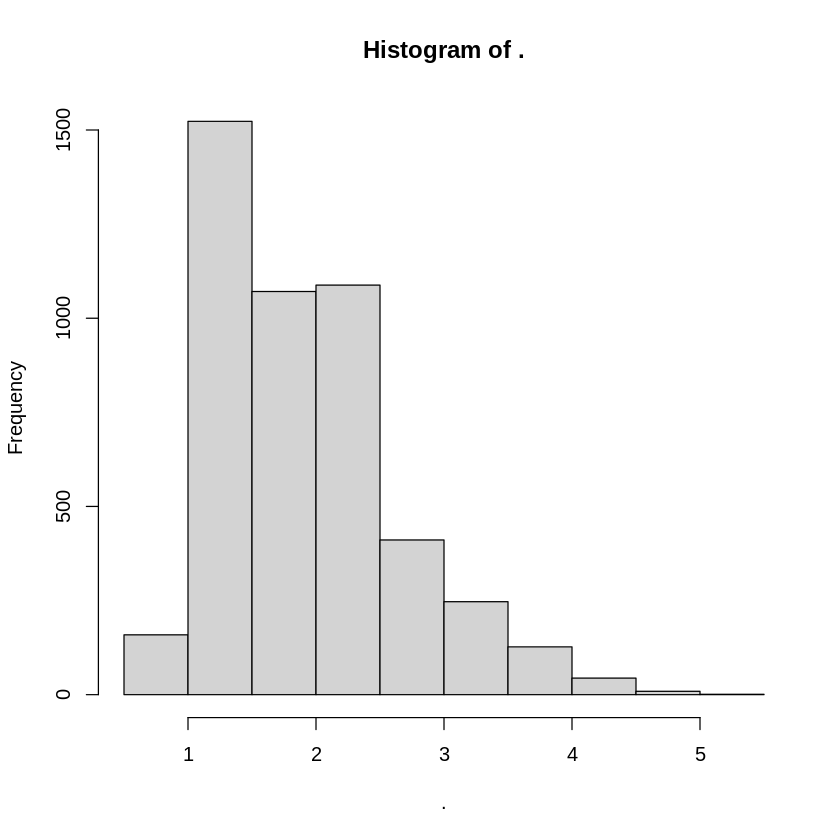

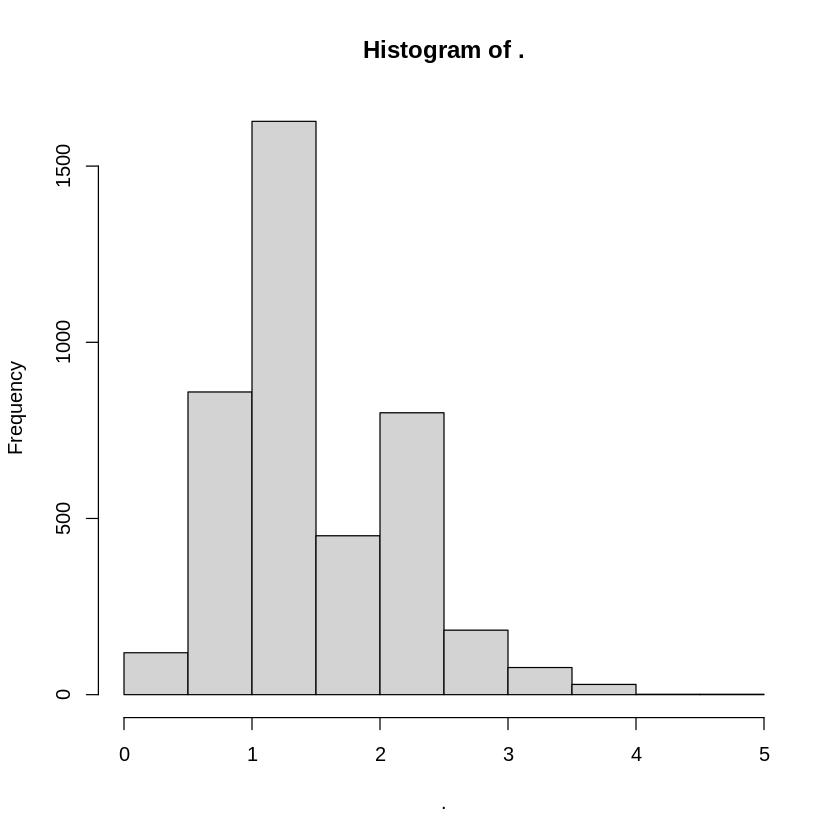

In [98]:
sss %>%
  pull(all_max_value) %>%
  log() %>%
  hist()

sss %>%
  pull(type_max_value) %>%
  log() %>%
  hist()

In [109]:
sss %>%
  select(TotalReads, type_max_value) %>%
  head()

sss %>%
  pull(TotalReads) %>%
  sum()


sss %>%
  pull(type_max_value) %>%
  sum()


TotalReads,type_max_value
<int>,<dbl>
4,0
4,4
13,6
6,4
17,8
14,4


[1] 65933

[1] 24606

In [111]:
q <- 8
m <- 24606
n <- 65933 - 24606
k <- 17


phyper(q, m, n, k, lower.tail = FALSE)

[1] 0.1402872

In [41]:
#?phyper